# How the sausage is made

In [1]:
import numpy as np
import matplotlib.pyplot as plt

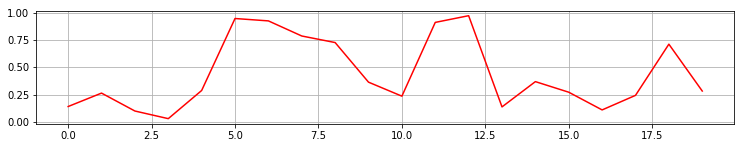

In [2]:
# Generate random numbers as an example
rn = np.random.uniform(low=0, high=1, size=(20,))

# Make a random plot...
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rn,"r")
ax.grid()
#######################


# Setup the canvas object to extract images INCLUDING axes elements
width = 900 #pixels
height = 150 #pixels
# matplotlib likes image sizes in inches (thanks America)
# so we need to now how many pixels fit on a inch on your screen (DotsPerInch)
DPI = fig.get_dpi()
fig.set_size_inches(width/float(DPI),height/float(DPI))
fig.canvas.draw()
#######################

# Now we can save it to a numpy array. These are faily obscure functions...
# the .tostring_rgb() generates a binary representation of the WHOLE plot
# np.frombuffer reads the binary and interprets it as a collection of integers
# At the end they're just a long list of RGB colors in 1 dimension
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

# Retrieve the original shape of the plot inverted (height, width)
im_shape = fig.canvas.get_width_height()[::-1]

# We can now make a 3-D array (height, width, 3) "one 2D image per color channel"
data = data.reshape(*im_shape, 3)

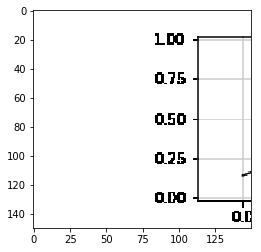

In [3]:
plt.imshow(data[:,0:150,2], cmap="Greys_r")

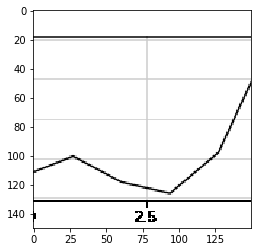

In [4]:
plt.imshow(data[:,150:300,2], cmap="Greys_r")